# Assignment 1 - Experiments with Machine Learning
Alice Chen
Georgia Pitic
Ryan Kim

Path: deliverable.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier

### 1. Load Data

In [3]:
# a. methods of convertion
# i. Convert dummy coded data

dataAbalone = pd.read_csv('abalone.csv')
dataPenguins = pd.read_csv('penguins.csv')
dataPenguins = pd.get_dummies(dataPenguins, columns=['island', 'sex'])
dataPenguins.to_csv('penguins_with_dummies.csv', index=False)

dataPenguinsWithDummy = pd.read_csv('penguins_with_dummies.csv')


### 2. Plot the percentages of each class

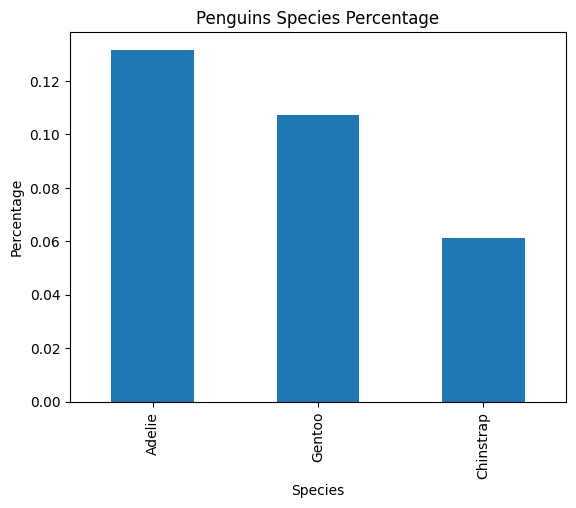

In [4]:
# Penguines plot percentage
dataPenguinsPercentage = (dataPenguinsWithDummy['species'].value_counts(
    normalize=True) / len(dataPenguinsWithDummy)) * 100

dataPenguinsPercentage.plot(kind='bar')
plt.title('Penguins Species Percentage')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.savefig('penguinsPercentage.png')
plt.show()

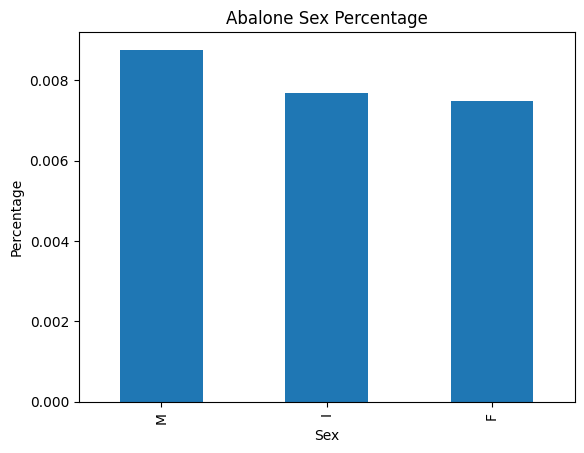

In [5]:
# Abalone plot percentage
dataAbalonePercentage = (dataAbalone['Type'].value_counts(
    normalize=True) / len(dataAbalone)) * 100

dataAbalonePercentage.plot(kind='bar')
plt.title('Abalone Sex Percentage')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.savefig('abalonePercentage.png')
plt.show()

### 3. Split dataset using train test split

In [6]:
# a. Penguins
X_penguins = dataPenguinsWithDummy.drop(['species'], axis=1)
y_penguins = dataPenguinsWithDummy['species']
X_penguinsTrain, X_penguinsTest, y_penguinsTrain, y_penguinsTest = train_test_split(X_penguins, y_penguins)

# b. Abalone
X_abalone = dataAbalone.drop(['Type'], axis=1)
y_abalone = dataAbalone['Type']
X_abaloneTrain, X_abaloneTest, y_abaloneTrain, y_abaloneTest = train_test_split(X_abalone, y_abalone)

### 4. Train and test 4 different classifiers

#### 4a Base DT

[Text(0.640625, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.642\nsamples = 249\nvalue = [107, 53, 89]'),
 Text(0.46875, 0.75, 'x[0] <= 43.35\ngini = 0.431\nsamples = 153\nvalue = [105, 48, 0]'),
 Text(0.3125, 0.5833333333333334, 'x[0] <= 42.3\ngini = 0.073\nsamples = 105\nvalue = [101, 4, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 16.7\ngini = 0.021\nsamples = 95\nvalue = [94, 1, 0]'),
 Text(0.125, 0.25, 'x[0] <= 38.7\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 87\nvalue = [87, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.625, 0.5833333333333334, 'x[5] <= 0.5\ngini = 0.153\nsamp

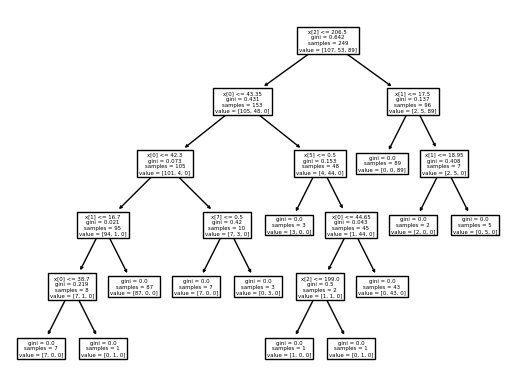

In [7]:
dtc_penguins = tree.DecisionTreeClassifier()
dtc_abalone = tree.DecisionTreeClassifier(max_depth=4)

# i. Penguins
dtc_penguins.fit(X_penguinsTrain, y_penguinsTrain)
tree.plot_tree(dtc_penguins)

[Text(0.5, 0.9, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3132\nvalue = [973, 1013, 1146]'),
 Text(0.25, 0.7, 'x[7] <= 8.5\ngini = 0.531\nsamples = 1311\nvalue = [195, 827, 289]'),
 Text(0.125, 0.5, 'x[6] <= 0.127\ngini = 0.381\nsamples = 859\nvalue = [65, 659, 135]'),
 Text(0.0625, 0.3, 'x[2] <= 0.113\ngini = 0.292\nsamples = 640\nvalue = [30, 532, 78]'),
 Text(0.03125, 0.1, 'gini = 0.264\nsamples = 578\nvalue = [20, 491, 67]'),
 Text(0.09375, 0.1, 'gini = 0.505\nsamples = 62\nvalue = [10, 41, 11]'),
 Text(0.1875, 0.3, 'x[0] <= 0.483\ngini = 0.57\nsamples = 219\nvalue = [35, 127, 57]'),
 Text(0.15625, 0.1, 'gini = 0.634\nsamples = 107\nvalue = [23, 50, 34]'),
 Text(0.21875, 0.1, 'gini = 0.474\nsamples = 112\nvalue = [12, 77, 23]'),
 Text(0.375, 0.5, 'x[2] <= 0.098\ngini = 0.663\nsamples = 452\nvalue = [130, 168, 154]'),
 Text(0.3125, 0.3, 'x[0] <= 0.292\ngini = 0.504\nsamples = 54\nvalue = [5, 14, 35]'),
 Text(0.28125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.34375, 0

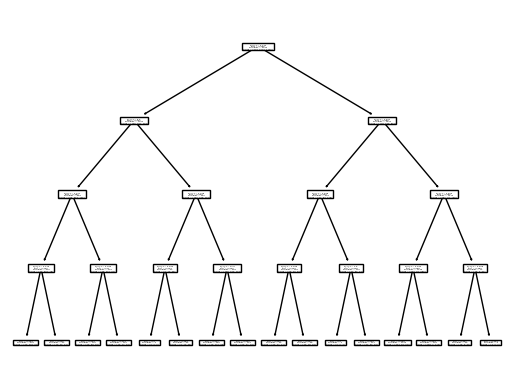

In [8]:
# ii. Abalone
dtc_abalone.fit(X_abaloneTrain, y_abaloneTrain)
tree.plot_tree(dtc_abalone)

#### 4b Top DT

In [9]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

# i. Penguins
topDTC_penguins = tree.DecisionTreeClassifier()
grid_search_penguins = GridSearchCV(estimator=topDTC_penguins, param_grid=params_grid)

grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)
# print(grid_search.best_score_)
print(grid_search_penguins.best_estimator_)
# print(grid_search_penguins.best_params_)
best_dt_classifier = grid_search_penguins.best_estimator_

# best_dt_classifier.fit(X_penguinsTest, y_penguinsTest)
# tree.plot_tree(grid_search.best_estimator_)

# FOR LATER IN STEP 6
# accuracy = best_dt_classifier.score(X_penguinsTrain, y_penguinsTrain)
# print('Penguins Decision Tree Accuracy: ', accuracy)

DecisionTreeClassifier(criterion='entropy')


In [10]:
# ii. Abalone

topDTC_abalone = tree.DecisionTreeClassifier(max_depth=6)
grid_search_abalone = GridSearchCV(estimator=topDTC_abalone, param_grid=params_grid)
grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
best_dt_classifier = grid_search_abalone.best_estimator_

# best_dt_classifier.fit(X_abaloneTest, y_abaloneTest)
# FOR LATER IN STEP 6
# accuracy = best_dt_classifier.score(X_abaloneTest, y_abaloneTest)
# print('Penguins Decision Tree Accuracy: ', accuracy)

#### 4c Base MLP

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

# i. Penguins
clf.fit(X_penguinsTrain, y_penguinsTrain)
clf.score(X_penguinsTest, y_penguinsTest)


0.4642857142857143

In [12]:
# ii. Abalone
clf.fit(X_abaloneTrain, y_abaloneTrain)
clf.score(X_abaloneTest, y_abaloneTest)

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5358851674641149

#### 4d Top MLP

In [13]:
# d. TOP MLP
# i. Penguins

params_grid = {
    'activation': ['logistic', 'tanh', 'relu'], # assuming sigmoid is alike logistic
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}

grid_search_penguins = GridSearchCV(estimator=MLPClassifier(), param_grid=params_grid)

grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)

best_top_mlp_classifier = grid_search_penguins.best_estimator_

best_top_mlp_param = grid_search_penguins.best_params_

best_top_nlp_score = grid_search_penguins.best_score_




# print('Best MLP Classifier: ', best_top_mlp_classifier)
# print('Best MLP Parameters: ', best_top_mlp_param)
# print('Best MLP Score: ', best_top_nlp_score)

# FOR LATER IN STEP 6
# accuracy = best_dt_classifier.score(X_penguinsTrain, y_penguinsTrain)
# print('Penguins Decision Tree Accuracy: ', accuracy)

# Predict the target values for the test data
# y_pred = best_mlp_classifier.predict(X_penguinsTest)

# Print the accuracy score of the MLPClassifier object with the best parameters
# print("Accuracy score: ", best_mlp_classifier.score(X_penguinsTest, y_penguinsTest))


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# ii. Abalone

params_grid = {
    'activation': ['logistic', 'tanh', 'relu'], # assuming sigmoid is alike logistic
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}

grid_search_abalone = GridSearchCV(estimator=MLPClassifier(), param_grid=params_grid)

grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)

best_top_mlp_classifier = grid_search_abalone.best_estimator_

best_top_mlp_param = grid_search_abalone.best_params_

best_top_nlp_score = grid_search_abalone.best_score_


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 5: A (model & description) - B (confusion matrix) - C (precision, recall, F1-measure) - D (accuracy, macro-avg F1, weighted-avg F1)

In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

separator = '-' * 50

# Base DT

# penguins
dtc_penguins = tree.DecisionTreeClassifier()
dtc_penguins.fit(X_penguinsTrain, y_penguinsTrain)

# (B) confusion matrix
y_pred_penguins = dtc_penguins.predict(X_penguinsTest)
cm_penguins = confusion_matrix(y_penguinsTest, y_pred_penguins)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_penguins = precision_score(y_penguinsTest, y_pred_penguins, average=None)
recall_penguins = recall_score(y_penguinsTest, y_pred_penguins, average=None)
f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_penguins = accuracy_score(y_penguinsTest, y_pred_penguins)
macro_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='macro')
weighted_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='weighted')

# abaolone
dtc_abalone = tree.DecisionTreeClassifier(max_depth=4)
dtc_abalone.fit(X_abaloneTrain, y_abaloneTrain)

# (B) confusion matrix
y_pred_abalone = dtc_abalone.predict(X_abaloneTest)
cm_abalone = confusion_matrix(y_abaloneTest, y_pred_abalone)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_abalone = precision_score(y_abaloneTest, y_pred_abalone, average=None)
recall_abalone = recall_score(y_abaloneTest, y_pred_abalone, average=None)
f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_abalone = accuracy_score(y_abaloneTest, y_pred_abalone)
macro_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='macro')
weighted_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='weighted')

model_name = 'Base-DT'
hyperparameters = {'max_depth': 4}
model_description = f"(max_depth={hyperparameters['max_depth']})"

print(separator)
print(f"(A) Model: {model_name}")
print(f"(A) Hyper-parameter values for penguins: none")
print(f"(A) Hyper-parameter values for abalone: {model_description}")
print(f"(B) Confusion matrix for penguins:\n{cm_penguins}")
print(f"(B) Confusion matrix for abalone:\n{cm_abalone}")
print(f"(C) Precision, recall, and F1-measure for penguins:\n{precision_penguins}\n{recall_penguins}\n{f1_penguins}")
print(f"(C) Precision, recall, and F1-measure for abalone:\n{precision_abalone}\n{recall_abalone}\n{f1_abalone}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for penguins:\n{accuracy_penguins:.2f}\n{macro_f1_penguins:.2f}\n{weighted_f1_penguins:.2f}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for abalone:\n{accuracy_abalone:.2f}\n{macro_f1_abalone:.2f}\n{weighted_f1_abalone:.2f}")

# Top DT
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

model_name = 'Top-DT'

# penguins
topDTC_penguins = tree.DecisionTreeClassifier()
grid_search_penguins = GridSearchCV(estimator=topDTC_penguins, param_grid=params_grid)
grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)
hyperparameters_penguins = grid_search_penguins.best_params_

# (B) confusion matrix
y_pred_penguins = grid_search_penguins.predict(X_penguinsTest)
cm_penguins = confusion_matrix(y_penguinsTest, y_pred_penguins)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_penguins = precision_score(y_penguinsTest, y_pred_penguins, average=None)
recall_penguins = recall_score(y_penguinsTest, y_pred_penguins, average=None)
f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_penguins = accuracy_score(y_penguinsTest, y_pred_penguins)
macro_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='macro')
weighted_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='weighted')

# abalone
topDTC_abalone = tree.DecisionTreeClassifier(max_depth=6)
grid_search_abalone = GridSearchCV(estimator=topDTC_abalone, param_grid=params_grid)
grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)
hyperparameters_abalone = grid_search_abalone.best_params_

# (B) confusion matrix
y_pred_abalone = grid_search_abalone.predict(X_abaloneTest)
cm_abalone = confusion_matrix(y_abaloneTest, y_pred_abalone)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_abalone = precision_score(y_abaloneTest, y_pred_abalone, average=None)
recall_abalone = recall_score(y_abaloneTest, y_pred_abalone, average=None)
f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_abalone = accuracy_score(y_abaloneTest, y_pred_abalone)
macro_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='macro')
weighted_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='weighted')

print(separator)
print(f"(A) Model: {model_name}")
print(f"(A) Hyper-parameter values: {params_grid}")
print(f"(A) Best hyperparameters (for penguins): {hyperparameters_penguins}")
print(f"(A) Best hyperparameters (for penguins): {hyperparameters_abalone}")
print(f"(B) Confusion matrix for penguins:\n{cm_penguins}")
print(f"(B) Confusion matrix for abalone:\n{cm_abalone}")
print(f"(C) Precision, recall, and F1-measure for penguins:\n{precision_penguins}\n{recall_penguins}\n{f1_penguins}")
print(f"(C) Precision, recall, and F1-measure for abalone:\n{precision_abalone}\n{recall_abalone}\n{f1_abalone}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for penguins:\n{accuracy_penguins:.2f}\n{macro_f1_penguins:.2f}\n{weighted_f1_penguins:.2f}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for abalone:\n{accuracy_abalone:.2f}\n{macro_f1_abalone:.2f}\n{weighted_f1_abalone:.2f}")

# Base MLP
model_name = 'Base-MLP'

# penguins
clf = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')
best_params = clf.get_params()
default_params = MLPClassifier().get_params()
changed_params = {k: v for k, v in best_params.items() if v != default_params[k]}

# (B) confusion matrix
clf.fit(X_penguinsTrain, y_penguinsTrain)
y_pred_penguins = clf.predict(X_penguinsTest)
cm_penguins = confusion_matrix(y_penguinsTest, y_pred_penguins)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_penguins = precision_score(y_penguinsTest, y_pred_penguins, average=None)
recall_penguins = recall_score(y_penguinsTest, y_pred_penguins, average=None)
f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_penguins = accuracy_score(y_penguinsTest, y_pred_penguins)
macro_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='macro')
weighted_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='weighted')

# abalone
clf = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')
clf.fit(X_abaloneTrain, y_abaloneTrain)

# (B) confusion matrix
y_pred_abalone = clf.predict(X_abaloneTest)
cm_abalone = confusion_matrix(y_abaloneTest, y_pred_abalone)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_abalone = precision_score(y_abaloneTest, y_pred_abalone, average=None)
recall_abalone = recall_score(y_abaloneTest, y_pred_abalone, average=None)
f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_abalone = accuracy_score(y_abaloneTest, y_pred_abalone)
macro_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='macro')
weighted_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='weighted')

print(separator)
print(f"(A) Model: {model_name}")
print(f"(A) Hyper-parameter values: {changed_params}")
print(f"(B) Confusion matrix for penguins:\n{cm_penguins}")
print(f"(B) Confusion matrix for abalone:\n{cm_abalone}")
print(f"(C) Precision, recall, and F1-measure for penguins:\n{precision_penguins}\n{recall_penguins}\n{f1_penguins}")
print(f"(C) Precision, recall, and F1-measure for abalone:\n{precision_abalone}\n{recall_abalone}\n{f1_abalone}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for penguins:\n{accuracy_penguins:.2f}\n{macro_f1_penguins:.2f}\n{weighted_f1_penguins:.2f}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for abalone:\n{accuracy_abalone:.2f}\n{macro_f1_abalone:.2f}\n{weighted_f1_abalone:.2f}")

# Top MLP
params_grid = {
    'activation': ['logistic', 'tanh', 'relu'], # assuming sigmoid is alike logistic
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}

model_name = 'Top-MLP'

# penguins
grid_search_penguins = GridSearchCV(estimator=MLPClassifier(), param_grid=params_grid)
grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)
hyperparameters_penguins = grid_search_penguins.best_params_

# (B) confusion matrix
y_pred_penguins = grid_search_penguins.predict(X_penguinsTest)
cm_penguins = confusion_matrix(y_penguinsTest, y_pred_penguins)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_penguins = precision_score(y_penguinsTest, y_pred_penguins, average=None)
recall_penguins = recall_score(y_penguinsTest, y_pred_penguins, average=None)
f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_penguins = accuracy_score(y_penguinsTest, y_pred_penguins)
macro_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='macro')
weighted_f1_penguins = f1_score(y_penguinsTest, y_pred_penguins, average='weighted')

# abalone
grid_search_abalone = GridSearchCV(estimator=MLPClassifier(), param_grid=params_grid)
grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)
hyperparameters_abalone = grid_search_abalone.best_params_

# (B) confusion matrix
y_pred_abalone = grid_search_abalone.predict(X_abaloneTest)
cm_abalone = confusion_matrix(y_abaloneTest, y_pred_abalone)

# (C) Evaluate the classifier's performance on the testing set using precision, recall, and F1-measure metrics
precision_abalone = precision_score(y_abaloneTest, y_pred_abalone, average=None)
recall_abalone = recall_score(y_abaloneTest, y_pred_abalone, average=None)
f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average=None)

# (D) Evaluate the classifier's performance on the testing set using accuracy, macro-average F1, and weighted-average F1 metrics
accuracy_abalone = accuracy_score(y_abaloneTest, y_pred_abalone)
macro_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='macro')
weighted_f1_abalone = f1_score(y_abaloneTest, y_pred_abalone, average='weighted')

print(separator)
print(f"(A) Model: {model_name}")
print(f"(A) Hyper-parameter values: {params_grid}")
print(f"(A) Best hyperparameters (for penguins): {hyperparameters_penguins}")
print(f"(A) Best hyperparameters (for penguins): {hyperparameters_abalone}")
print(f"(B) Confusion matrix for penguins:\n{cm_penguins}")
print(f"(B) Confusion matrix for abalone:\n{cm_abalone}")
print(f"(C) Precision, recall, and F1-measure for penguins:\n{precision_penguins}\n{recall_penguins}\n{f1_penguins}")
print(f"(C) Precision, recall, and F1-measure for abalone:\n{precision_abalone}\n{recall_abalone}\n{f1_abalone}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for penguins:\n{accuracy_penguins:.2f}\n{macro_f1_penguins:.2f}\n{weighted_f1_penguins:.2f}")
print(f"(D) Accuracy, macro-average F1, and weighted-average F1 for abalone:\n{accuracy_abalone:.2f}\n{macro_f1_abalone:.2f}\n{weighted_f1_abalone:.2f}")



--------------------------------------------------
(A) Model: Top-DT
(A) Hyper-parameter values: {'criterion': ['gini', 'entropy'], 'max_depth': [4, 6, None], 'min_samples_split': [2, 4, 6]}
(A) Best hyperparameters (for penguins): {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
(A) Best hyperparameters (for penguins): {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
(B) Confusion matrix for penguins:
[[39  0  0]
 [ 0 15  0]
 [ 1  0 29]]
(B) Confusion matrix for abalone:
[[116  58 160]
 [ 19 266  44]
 [104  74 204]]
(C) Precision, recall, and F1-measure for penguins:
[0.975 1.    1.   ]
[1.         1.         0.96666667]
[0.98734177 1.         0.98305085]
(C) Precision, recall, and F1-measure for abalone:
[0.48535565 0.66834171 0.5       ]
[0.34730539 0.80851064 0.53403141]
[0.40488656 0.73177442 0.5164557 ]
(D) Accuracy, macro-average F1, and weighted-average F1 for penguins:
0.99
0.99
0.99
(D) Accuracy, macro-average F1, and weighted-average F1 for abalo

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

#### 6: Avg accuracy & variance, avg macro-avg F1 & variance and avg weighted-avg F1 & variance

In [55]:
separator = '-' * 50

# Base DT

# penguins
dtc_penguins = tree.DecisionTreeClassifier()

# (A) Perform 5-fold cross-validation
accuracy_scores_penguins = cross_val_score(dtc_penguins, X_penguins, y_penguins, cv=5)
# accuracy_scores_penguins = cross_val_score(dtc_penguins, X_penguinsTest, y_penguinsTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_penguins = accuracy_scores_penguins.mean()
avg_accuracy_variance_penguins = accuracy_scores_penguins.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_penguins = cross_val_score(dtc_penguins, X_penguins, y_penguins, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_penguins = avg_macro_avg_f1_scores_penguins.mean()
avg_macro_avg_f1_penguins_variance = avg_macro_avg_f1_scores_penguins.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_penguins = cross_val_score(dtc_penguins, X_penguins, y_penguins, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_penguins = avg_weighted_avg_f1_scores_penguins.mean()
avg_weighted_avg_f1_variance_penguins = avg_weighted_avg_f1_scores_penguins.var()

# abalone
dtc_abalone = tree.DecisionTreeClassifier(max_depth=4)

# (A) Perform 5-fold cross-validation
accuracy_scores_abalone = cross_val_score(dtc_abalone, X_abalone, y_abalone, cv=5)
# accuracy_scores_abalone = cross_val_score(dtc_abalone, X_abaloneTest, y_abaloneTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_abalone = accuracy_scores_abalone.mean()
avg_accuracy_variance_abalone = accuracy_scores_abalone.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_abalone = cross_val_score(dtc_abalone, X_abalone, y_abalone, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_abalone = avg_macro_avg_f1_scores_abalone.mean()
avg_macro_avg_f1_abalone_variance = avg_macro_avg_f1_scores_abalone.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_abalone = cross_val_score(dtc_abalone, X_abalone, y_abalone, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_abalone = avg_weighted_avg_f1_scores_abalone.mean()
avg_weighted_avg_f1_variance_abalone = avg_weighted_avg_f1_scores_abalone.var()


print(separator)
print(f"Model: Base-DT")
print(f"(A) Average accuracy for penguins: {avg_accuracy_penguins}")
print(f"(A) Variance for penguins: {avg_accuracy_variance_penguins}")
print(f"(A) Average accuracy for abalone: {avg_accuracy_abalone}")
print(f"(A) Variance for abalone: {avg_accuracy_variance_abalone}")
print(f"(B) Average macro-average F1 for penguins: {avg_macro_avg_f1_penguins}")
print(f"(B) Variance for penguins: {avg_macro_avg_f1_penguins_variance}")
print(f"(B) Average macro-average F1 for abalone: {avg_macro_avg_f1_abalone}")
print(f"(B) Variance for abalone: {avg_macro_avg_f1_abalone_variance}")
print(f"(C) Average weighted-average F1 for penguins: {avg_weighted_avg_f1_penguins}")
print(f"(C) Variance for penguins: {avg_weighted_avg_f1_variance_penguins}")
print(f"(C) Average weighted-average F1 for abalone: {avg_weighted_avg_f1_abalone}")
print(f"(C) Variance for abalone: {avg_weighted_avg_f1_variance_abalone}")

# Top DT

# penguins
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}
topDTC_penguins = tree.DecisionTreeClassifier()
grid_search_penguins = GridSearchCV(estimator=topDTC_penguins, param_grid=params_grid)

# (A) Perform 5-fold cross-validation
accuracy_scores_penguins = cross_val_score(grid_search_penguins, X_penguins, y_penguins, cv=5)
# accuracy_scores_penguins = cross_val_score(grid_search_penguins, X_penguinsTest, y_penguinsTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_penguins = accuracy_scores_penguins.mean()
avg_accuracy_variance_penguins = accuracy_scores_penguins.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_penguins = cross_val_score(grid_search_penguins, X_penguins, y_penguins, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_penguins = avg_macro_avg_f1_scores_penguins.mean()
avg_macro_avg_f1_penguins_variance = avg_macro_avg_f1_scores_penguins.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_penguins = cross_val_score(grid_search_penguins, X_penguins, y_penguins, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_penguins = avg_weighted_avg_f1_scores_penguins.mean()
avg_weighted_avg_f1_variance_penguins = avg_weighted_avg_f1_scores_penguins.var()

# abalone
topDTC_abalone = tree.DecisionTreeClassifier(max_depth=6)
grid_search_abalone = GridSearchCV(estimator=topDTC_abalone, param_grid=params_grid)

# (A) Perform 5-fold cross-validation
accuracy_scores_abalone = cross_val_score(grid_search_abalone, X_abalone, y_abalone, cv=5)
# accuracy_scores_abalone = cross_val_score(grid_search_abalone, X_abaloneTest, y_abaloneTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_abalone = accuracy_scores_abalone.mean()
avg_accuracy_variance_abalone = accuracy_scores_abalone.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_abalone = cross_val_score(grid_search_abalone, X_abalone, y_abalone, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_abalone = avg_macro_avg_f1_scores_abalone.mean()
avg_macro_avg_f1_abalone_variance = avg_macro_avg_f1_scores_abalone.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_abalone = cross_val_score(grid_search_abalone, X_abalone, y_abalone, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_abalone = avg_weighted_avg_f1_scores_abalone.mean()
avg_weighted_avg_f1_variance_abalone = avg_weighted_avg_f1_scores_abalone.var()

print(separator)
print(f"Model: Top-DT")
print(f"(A) Average accuracy for penguins: {avg_accuracy_penguins}")
print(f"(A) Variance for penguins: {avg_accuracy_variance_penguins}")
print(f"(A) Average accuracy for abalone: {avg_accuracy_abalone}")
print(f"(A) Variance for abalone: {avg_accuracy_variance_abalone}")
print(f"(B) Average macro-average F1 for penguins: {avg_macro_avg_f1_penguins}")
print(f"(B) Variance for penguins: {avg_macro_avg_f1_penguins_variance}")
print(f"(B) Average macro-average F1 for abalone: {avg_macro_avg_f1_abalone}")
print(f"(B) Variance for abalone: {avg_macro_avg_f1_abalone_variance}")
print(f"(C) Average weighted-average F1 for penguins: {avg_weighted_avg_f1_penguins}")
print(f"(C) Variance for penguins: {avg_weighted_avg_f1_variance_penguins}")
print(f"(C) Average weighted-average F1 for abalone: {avg_weighted_avg_f1_abalone}")
print(f"(C) Variance for abalone: {avg_weighted_avg_f1_variance_abalone}")

# Base MLP

# penguins
clf = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

# (A) Perform 5-fold cross-validation
accuracy_scores_penguins = cross_val_score(clf, X_penguins, y_penguins, cv=5)
# accuracy_scores_penguins = cross_val_score(clf, X_penguinsTest, y_penguinsTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_penguins = accuracy_scores_penguins.mean()
avg_accuracy_variance_penguins = accuracy_scores_penguins.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_penguins = cross_val_score(clf, X_penguins, y_penguins, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_penguins = avg_macro_avg_f1_scores_penguins.mean()
avg_macro_avg_f1_penguins_variance = avg_macro_avg_f1_scores_penguins.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_penguins = cross_val_score(clf, X_penguins, y_penguins, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_penguins = avg_weighted_avg_f1_scores_penguins.mean()
avg_weighted_avg_f1_variance_penguins = avg_weighted_avg_f1_scores_penguins.var()

# abalone
# (A) Perform 5-fold cross-validation
accuracy_scores_abalone = cross_val_score(clf, X_abalone, y_abalone, cv=5)
# accuracy_scores_abalone = cross_val_score(clf, X_abaloneTest, y_abaloneTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_abalone = accuracy_scores_abalone.mean()
avg_accuracy_variance_abalone = accuracy_scores_abalone.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_abalone = cross_val_score(clf, X_abalone, y_abalone, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_abalone = avg_macro_avg_f1_scores_abalone.mean()
avg_macro_avg_f1_abalone_variance = avg_macro_avg_f1_scores_abalone.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_abalone = cross_val_score(clf, X_abalone, y_abalone, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_abalone = avg_weighted_avg_f1_scores_abalone.mean()
avg_weighted_avg_f1_variance_abalone = avg_weighted_avg_f1_scores_abalone.var()

print(separator)
print(f"Model: Base-MLP")
print(f"(A) Average accuracy for penguins: {avg_accuracy_penguins}")
print(f"(A) Variance for penguins: {avg_accuracy_variance_penguins}")
print(f"(A) Average accuracy for abalone: {avg_accuracy_abalone}")
print(f"(A) Variance for abalone: {avg_accuracy_variance_abalone}")
print(f"(B) Average macro-average F1 for penguins: {avg_macro_avg_f1_penguins}")
print(f"(B) Variance for penguins: {avg_macro_avg_f1_penguins_variance}")
print(f"(B) Average macro-average F1 for abalone: {avg_macro_avg_f1_abalone}")
print(f"(B) Variance for abalone: {avg_macro_avg_f1_abalone_variance}")
print(f"(C) Average weighted-average F1 for penguins: {avg_weighted_avg_f1_penguins}")
print(f"(C) Variance for penguins: {avg_weighted_avg_f1_variance_penguins}")
print(f"(C) Average weighted-average F1 for abalone: {avg_weighted_avg_f1_abalone}")
print(f"(C) Variance for abalone: {avg_weighted_avg_f1_variance_abalone}")

# Top MLP

# penguins
params_grid = {
    'activation': ['logistic', 'tanh', 'relu'], # assuming sigmoid is alike logistic
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
grid_search_penguins = GridSearchCV(estimator=MLPClassifier(), param_grid=params_grid)

# (A) Perform 5-fold cross-validation
accuracy_scores_penguins = cross_val_score(grid_search_penguins, X_penguins, y_penguins, cv=5)
# accuracy_scores_penguins = cross_val_score(grid_search_penguins, X_abaloneTest, y_penguinsTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_penguins = accuracy_scores_penguins.mean()
avg_accuracy_variance_penguins = accuracy_scores_penguins.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_penguins = cross_val_score(grid_search_penguins, X_penguins, y_penguins, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_penguins = avg_macro_avg_f1_scores_penguins.mean()
avg_macro_avg_f1_penguins_variance = avg_macro_avg_f1_scores_penguins.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_penguins = cross_val_score(grid_search_penguins, X_penguins, y_penguins, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_penguins = avg_weighted_avg_f1_scores_penguins.mean()
avg_weighted_avg_f1_variance_penguins = avg_weighted_avg_f1_scores_penguins.var()

# abalone
grid_search_abalone = GridSearchCV(estimator=MLPClassifier(), param_grid=params_grid)

# (A) Perform 5-fold cross-validation
accuracy_scores_abalone = cross_val_score(grid_search_abalone, X_abalone, y_abalone, cv=5)
# accuracy_scores_abalone = cross_val_score(grid_search_abalone, X_abaloneTest, y_abaloneTest, cv=5)

# (A) Calculate the average accuracy and variance
avg_accuracy_abalone = accuracy_scores_abalone.mean()
avg_accuracy_variance_abalone = accuracy_scores_abalone.var()

# (B) Perform 5-fold cross-validation
avg_macro_avg_f1_scores_abalone = cross_val_score(grid_search_abalone, X_abalone, y_abalone, cv=5, scoring='f1_macro')

# (B) Calculate the average macro-average F1 and variance
avg_macro_avg_f1_abalone = avg_macro_avg_f1_scores_abalone.mean()
avg_macro_avg_f1_abalone_variance = avg_macro_avg_f1_scores_abalone.var()

# (C) Perform 5-fold cross-validation
avg_weighted_avg_f1_scores_abalone = cross_val_score(grid_search_abalone, X_abalone, y_abalone, cv=5, scoring='f1_weighted')

# (C) Calculate the average weighted-average F1 and variance
avg_weighted_avg_f1_abalone = avg_weighted_avg_f1_scores_abalone.mean()
avg_weighted_avg_f1_variance_abalone = avg_weighted_avg_f1_scores_abalone.var()

print(separator)
print(f"Model: Top-MLP")
print(f"(A) Average accuracy for penguins: {avg_accuracy_penguins}")
print(f"(A) Variance for penguins: {avg_accuracy_variance_penguins}")
print(f"(A) Average accuracy for abalone: {avg_accuracy_abalone}")
print(f"(A) Variance for abalone: {avg_accuracy_variance_abalone}")
print(f"(B) Average macro-average F1 for penguins: {avg_macro_avg_f1_penguins}")
print(f"(B) Variance for penguins: {avg_macro_avg_f1_penguins_variance}")
print(f"(B) Average macro-average F1 for abalone: {avg_macro_avg_f1_abalone}")
print(f"(B) Variance for abalone: {avg_macro_avg_f1_abalone_variance}")
print(f"(C) Average weighted-average F1 for penguins: {avg_weighted_avg_f1_penguins}")
print(f"(C) Variance for penguins: {avg_weighted_avg_f1_variance_penguins}")
print(f"(C) Average weighted-average F1 for abalone: {avg_weighted_avg_f1_abalone}")
print(f"(C) Variance for abalone: {avg_weighted_avg_f1_variance_abalone}")



--------------------------------------------------
Model: Base-DT
(A) Average accuracy for penguins: 0.975893260967888
(A) Variance for penguins: 0.00023850976604171222
(A) Average accuracy for abalone: 0.5508749964186459
(A) Variance for abalone: 0.0002119102802769419
(B) Average macro-average F1 for penguins: 0.9706768848018801
(B) Variance for penguins: 0.00044690444638214243
(B) Average macro-average F1 for abalone: 0.5343055940387855
(B) Variance for abalone: 5.2353372332765265e-05
(C) Average weighted-average F1 for penguins: 0.9788042109622968
(C) Variance for penguins: 0.000243206521375888
(C) Average weighted-average F1 for abalone: 0.5349283107992941
(C) Variance for abalone: 7.352808497985798e-05
--------------------------------------------------
Model: Top-DT
(A) Average accuracy for penguins: 0.9789235639981909
(A) Variance for penguins: 0.0002376874314337603
(A) Average accuracy for abalone: 0.552312122167149
(A) Variance for abalone: 0.00017721058817902994
(B) Average ma

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

--------------------------------------------------
Model: Base-MLP
(A) Average accuracy for penguins: 0.4384441429217548
(A) Variance for penguins: 3.030364398557373e-05
(A) Average accuracy for abalone: 0.5175950491361775
(A) Variance for abalone: 0.0001061456217531007
(B) Average macro-average F1 for penguins: 0.20319617772954723
(B) Variance for penguins: 3.1328928894331354e-06
(B) Average macro-average F1 for abalone: 0.4116375830543763
(B) Variance for abalone: 5.610476391330794e-05
(C) Average weighted-average F1 for penguins: 0.267299752654868
(C) Variance for penguins: 3.2487867770052486e-05
(C) Average weighted-average F1 for abalone: 0.43069413007605933
(C) Variance for abalone: 0.00013788409579515052


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

--------------------------------------------------
Model: Top-MLP
(A) Average accuracy for penguins: 0.49814563545906826
(A) Variance for penguins: 0.011924698697213326
(A) Average accuracy for abalone: 0.5482399793714008
(A) Variance for abalone: 0.0001416643203391948
(B) Average macro-average F1 for penguins: 0.4075802224182629
(B) Variance for penguins: 0.028623051414041912
(B) Average macro-average F1 for abalone: 0.5056989418753742
(B) Variance for abalone: 0.0012512517682903227
(C) Average weighted-average F1 for penguins: 0.267299752654868
(C) Variance for penguins: 3.2487867770052486e-05
(C) Average weighted-average F1 for abalone: 0.5094601630670037
(C) Variance for abalone: 0.0006963668210561682


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
import os

if not os.path.exists('penguin-performance.txt'):
    open('penguin-performance.txt', 'w').close()
if not os.path.exists('abalone-performance.txt'):
    open('abalone-performance.txt', 'w').close()

with open('penguin-performance.txt', 'a+') as f:
    f.write('New information to append\n')

with open('abalone-performance.txt', 'a+') as f:
    f.write('New 2\n')
